# Simple GoodReads Data Exploration

## 1. Setup and Data Loading

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [4]:
# print current working directory
print(f"Current working directory: {os.getcwd()}")

Current working directory: /Users/preston/goodreads-book-recommender/notebooks


In [5]:
def load_data(filename, directory='data/raw'):
    """Load data from a CSV file."""
    # calculate the file path
    if os.path.basename(os.getcwd()) == 'notebooks':
        file_path = Path('..') / directory / filename
    else:
        file_path = Path(directory) / filename

    # print the path we're trying to access
    print(f"Attempting to load from: {file_path}")

    # check if file exists
    if not file_path.exists():
        print(f"Warning: File not found at: {file_path}")

    # load the data
    print(f"Loading {filename}...")
    df = pd.read_csv(file_path)

    print(f"Successfully loaded {len(df)} rows")
    return df

In [6]:
# load each dataset
print("\nLoading datasets...\n")

datasets = {
    "ratings": "ratings.csv",
    "books": "books.csv",
    "to_read": "to_read.csv",
    "book_tags": "book_tags.csv",
    "tags": "tags.csv"
}

data = {}
for name, filename in datasets.items():
    data[name] = load_data(filename)


Loading datasets...

Attempting to load from: ../data/raw/ratings.csv
Loading ratings.csv...
Successfully loaded 5976479 rows
Attempting to load from: ../data/raw/books.csv
Loading books.csv...
Successfully loaded 10000 rows
Attempting to load from: ../data/raw/to_read.csv
Loading to_read.csv...
Successfully loaded 912705 rows
Attempting to load from: ../data/raw/book_tags.csv
Loading book_tags.csv...
Successfully loaded 999912 rows
Attempting to load from: ../data/raw/tags.csv
Loading tags.csv...
Successfully loaded 34252 rows


## 2. Basic Data Verification

In [7]:
def print_dataset_info(name, df):
    """Print basic information about a dataset."""
    if df is None:
        print(f"\n{name}: Failed to load")
        return
    
    print(f"\n{name}:")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {df.columns.tolist()}")
    print("   Sample data:")
    display(df.head(3))

In [8]:
# display information for each dataset
for name, df in data.items():
    print_dataset_info(name, df)


ratings:
   Shape: (5976479, 3)
   Columns: ['user_id', 'book_id', 'rating']
   Sample data:


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5



books:
   Shape: (10000, 23)
   Columns: ['book_id', 'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']
   Sample data:


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...



to_read:
   Shape: (912705, 2)
   Columns: ['user_id', 'book_id']
   Sample data:


,user_id,book_id
0,9,8
1,15,398
2,15,275



book_tags:
   Shape: (999912, 3)
   Columns: ['goodreads_book_id', 'tag_id', 'count']
   Sample data:


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173



tags:
   Shape: (34252, 2)
   Columns: ['tag_id', 'tag_name']
   Sample data:


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-


### 3. Check for Data Issues

In [9]:
def check_missing_values(name, df):
    """Check for missing values in a dataset."""
    if df is None:
        return
    
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n{name} - Missing values:")
        print(missing[missing > 0])
    else:
        print(f"\n{name} - No missing values")

In [10]:
# check for missing values in each dataset
for name, df in data.items():
    check_missing_values(name, df)


ratings - No missing values

books - Missing values:
isbn                          700
isbn13                        585
original_publication_year      21
original_title                585
language_code                1084
dtype: int64

to_read - No missing values

book_tags - No missing values

tags - No missing values


## 4. First Data Visualization

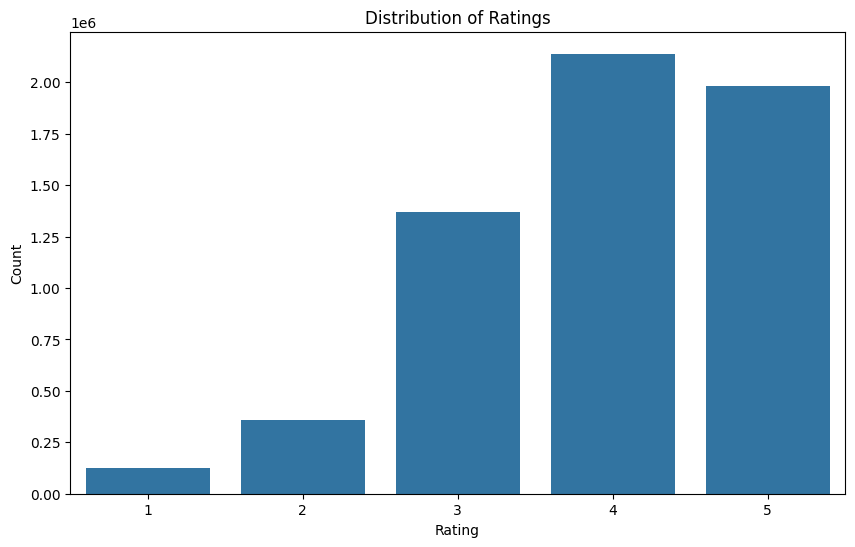


Ratings statistics:
  Average rating: 3.92
  Median rating: 4.0
  Total ratings: 5976479
  Unique users: 53424
  Unique books: 10000


In [11]:
# create a simple visualization of the ratings distribution
if data['ratings'] is not None:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=data["ratings"])
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()
    
    # Print some basic statistics
    print("\nRatings statistics:")
    print(f"  Average rating: {data['ratings']['rating'].mean():.2f}")
    print(f"  Median rating: {data['ratings']['rating'].median()}")
    print(f"  Total ratings: {len(data['ratings'])}")
    print(f"  Unique users: {data['ratings']['user_id'].nunique()}")
    print(f"  Unique books: {data['ratings']['book_id'].nunique()}")

## 5. Books Dataset Overview

In [12]:
if data['books'] is not None:
    # display column names
    print("\nBooks dataset columns:")
    for col in data['books'].columns:
        print(f"   {col}")

    # count books by language
    if 'language_code' in data['books'].columns:
        language_counts = data['books']['language_code'].value_counts().head(10)
        print("\nTop 10 book languages:")
        for lang, count in language_counts.items():
            print(f"   {lang}: {count} books")

    # list top authors by number of books
    if 'authors' in data['books'].columns:
        author_counts = data['books']['authors'].value_counts().head(10)
        print("\nTop 10 authors by number of books:")
        for author, count in author_counts.items():
            print(f"  {author}: {count} books")


Books dataset columns:
   book_id
   goodreads_book_id
   best_book_id
   work_id
   books_count
   isbn
   isbn13
   authors
   original_publication_year
   original_title
   title
   language_code
   average_rating
   ratings_count
   work_ratings_count
   work_text_reviews_count
   ratings_1
   ratings_2
   ratings_3
   ratings_4
   ratings_5
   image_url
   small_image_url

Top 10 book languages:
   eng: 6341 books
   en-US: 2070 books
   en-GB: 257 books
   ara: 64 books
   en-CA: 58 books
   fre: 25 books
   ind: 21 books
   spa: 20 books
   ger: 13 books
   per: 7 books

Top 10 authors by number of books:
  Stephen King: 60 books
  Nora Roberts: 59 books
  Dean Koontz: 47 books
  Terry Pratchett: 42 books
  Agatha Christie: 39 books
  Meg Cabot: 37 books
  James Patterson: 36 books
  David Baldacci: 34 books
  J.D. Robb: 33 books
  John Grisham: 33 books
